In [1]:
import tensorflow as tf

/home/sheikh/miniconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(tf.__version__)

1.4.0


In [3]:
hello = tf.constant('Hello Putky')

In [5]:
hello

<tf.Tensor 'Const:0' shape=() dtype=string>

In [6]:
x = tf.constant(100)

In [7]:
x

<tf.Tensor 'Const_1:0' shape=() dtype=int32>

In [9]:
sess = tf.Session()

In [10]:
sess.run(hello)

b'Hello Putky'

In [12]:
sess.run(x)

100

In [14]:
#operation
x = tf.constant(2)
y = tf.constant(3)

In [16]:
with tf.Session() as Sess:
    print('Operation with Constants')
    print('Addtion:', sess.run(x+y*20))

Operation with Constants
Addtion: 62


In [17]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

In [18]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [19]:
type(x)

tensorflow.python.framework.ops.Tensor

In [22]:
# defining the operation because x, y are variable not exact object so we need to define method for them
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)

In [23]:
d = {x:20,y:30}

In [24]:
with tf.Session() as sess:
    print('Operations with Constants')
    print('Addition',sess.run(add,feed_dict=d))
    print('Subtraction',sess.run(sub,feed_dict=d))
    print('Multiplication',sess.run(mul,feed_dict=d))

Operations with Constants
Addition 50
Subtraction -10
Multiplication 600


In [25]:
import numpy as np
# Make sure to use floats here, int64 will cause an error.
a = np.array([[5.0,5.0]])
b = np.array([[2.0],[2.0]])

In [26]:
a.shape

(1, 2)

In [27]:
b.shape

(2, 1)

In [28]:
mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [29]:
with tf.Session() as sess:
    result = sess.run(tf.matmul(mat1, mat2))
    print(result)

[[20.]]


In [31]:
# Practical
from tensorflow.examples.tutorials.mnist import input_data

In [33]:
mnist = input_data.read_data_sets("tmp/data/", one_hot=True)

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


In [34]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [35]:
mnist.train.images[2].shape

(784,)

In [36]:
sample = mnist.train.images[2].reshape(28,28)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

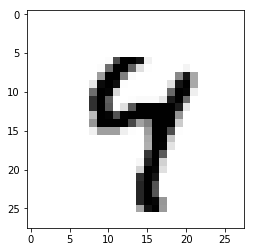

In [40]:
plt.imshow(sample, cmap='Greys')

In [41]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [43]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
n_samples = mnist.train.num_examples

In [58]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

In [63]:
W = tf.Variable(tf.zeros([n_input, n_classes]))
b = tf.Variable(tf.zeros([n_classes]))

y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, n_classes])

cross_entropy = tf.reduce_mean(- tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [67]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

correct_prediction = tf.equal(tf.argmax(y, 1), tf.arg_max(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_:mnist.test.labels}))

0.9245


In [70]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
iris = load_iris()

In [73]:
X = np.float32(iris['data'])
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [74]:
feature_column = [tf.contrib.layers.real_valued_column("", dimension=4)]
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_column,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                           model_dir = "./output")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_is_chief': True, '_evaluation_master': '', '_tf_random_seed': None, '_keep_checkpoint_max': 5, '_environment': 'local', '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_master': '', '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': './output', '_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f55b8748320>, '_num_worker_replicas': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_task_type': None, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100}


In [75]:
classifier.fit(X_train, y_train, steps=2000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./output/model.ckpt.
INFO:tensorflow:loss = 1.3410897, step = 1
INFO:tensorflow:global_step/sec: 158.26
INFO:tensorflow:loss = 0.20095947, step = 101 (0.636 sec)
INFO:tensorflow:global_step/sec: 168.416
INFO:tensorflow:loss = 0.09552

DNNClassifier(params={'activation_fn': <function relu at 0x7f5612d8abf8>, 'embedding_lr_multipliers': None, 'dropout': None, 'input_layer_min_slice_size': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f55b87484e0>, 'gradient_clip_norm': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'hidden_units': [10, 20, 10], 'optimizer': None})

In [76]:
accuracy_score = classifier.evaluate(X_test, y_test)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Starting evaluation at 2018-03-04-19:44:19
INFO:tensorflow:Restoring parameters from ./output/model.ckpt-2000
INFO:tensorflow:Finished evaluation at 2018-03-04-19:44:20
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.93333334, global_step = 2000, loss = 0.11505837
Accuracy: 0.933333


In [78]:
iris_prediction = list(classifier.predict(X_test))
print(classification_report(y_test, iris_prediction))
print(confusion_matrix(y_test,  iris_prediction))

INFO:tensorflow:Restoring parameters from ./output/model.ckpt-2000
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.88      0.93      0.90        15
          2       0.93      0.88      0.90        16

avg / total       0.93      0.93      0.93        45

[[14  0  0]
 [ 0 14  1]
 [ 0  2 14]]


In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

/home/sheikh/miniconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [38]:
iris = load_iris()

In [39]:
X = np.float32(iris['data'])

In [69]:
y = iris['target']

In [72]:
y.dtype

dtype('int64')

In [41]:
print(X[:5])
print('\n')
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


[0 0 0 0 0]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train

In [11]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

In [12]:
feature_columns

[_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None)]

In [13]:
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, 
                                            hidden_units=[10, 20, 10],
                                            n_classes = 3,
                                            model_dir = "./output"
                                           )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_environment': 'local', '_model_dir': './output', '_task_id': 0, '_task_type': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_log_step_count_steps': 100, '_is_chief': True, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff24b9af6d8>, '_num_worker_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_session_config': None}


In [16]:
classifier.fit(X_train, y_train, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./output/model.ckpt-2101
INFO:tensorflow:Saving checkpoints for 2102 into ./output/model.ckpt.
INFO:tensorflow:step = 2102, loss = 0.04302284
INFO:tensorflow:global_step/sec: 159.556
INFO:tensorflow:step = 2202, loss = 0.040260382 (0.631 sec)
INFO:tensorflow:global_step/sec: 179.668
INFO:tensorflow:step = 2302, loss = 0.038233243 (0.556 sec)
INFO:tensorflow:global_step/sec: 181.746
INFO:tensorflow:step = 2402, loss = 0.036677904 (0.551 sec)
INFO:tensorflow:global_step/sec: 179.216
INFO:tensorflow:step = 2502, loss = 0.035440214 (0.557 sec)
INFO:tensorflow:global_step/sec: 155.62
INFO:tensorflow:step = 2602, loss = 0.034423225 (0.645 sec)
INFO:tensorflow:global_step/sec: 151.771
INFO:tensorflow:step = 2702, loss = 0.033562977 (0.658 sec)
INFO:tensorflow:global_step/sec: 181.713
INFO:tensorflow:step = 2802, loss = 0.032816153 (0.549 sec)
INFO:tensorflow:global_step/sec: 181.935
INFO:tensorflow:step = 29

DNNClassifier(params={'hidden_units': [10, 20, 10], 'embedding_lr_multipliers': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'input_layer_min_slice_size': None, 'dropout': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7ff249ae8320>, 'activation_fn': <function relu at 0x7ff256045378>, 'gradient_clip_norm': None})

In [17]:
accuracy_score = classifier.evaluate(X_test, y_test)['accuracy']

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Starting evaluation at 2018-03-10-13:24:59
INFO:tensorflow:Restoring parameters from ./output/model.ckpt-3101
INFO:tensorflow:Finished evaluation at 2018-03-10-13:25:00
INFO:tensorflow:Saving dict for global step 3101: accuracy = 0.95555556, global_step = 3101, loss = 0.112563185


In [18]:
print('Accuracy: {0:f}'.format(accuracy_score))

Accuracy: 0.955556


In [19]:
iris_predictions = list(classifier.predict(X_test))

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from ./output/model.ckpt-3101


In [20]:
print(classification_report(y_test, iris_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      0.88      0.94        17
          2       0.89      1.00      0.94        16

avg / total       0.96      0.96      0.96        45



In [21]:
print(confusion_matrix(y_test, iris_predictions))

[[12  0  0]
 [ 0 15  2]
 [ 0  0 16]]


In [22]:
import pandas as pd

In [24]:
data = pd.read_csv('bank_note_data.csv')

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [29]:
scaler.fit(data.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
scaled_features = scaler.fit_transform(data.drop('Class', axis=1))

In [32]:
df_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [73]:
X = df_feat
y = data['Class']

In [74]:
X = X.as_matrix()
y = y.as_matrix()

In [75]:
X = np.float32(X)

In [76]:
y = np.int64(y)

In [77]:
np.unique(y)

array([0, 1])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [79]:
X_train[:5]

array([[ 1.2970865 , -0.8041635 ,  0.15622126,  0.8883604 ],
       [ 1.3627859 ,  1.0711685 , -0.97019076, -0.11519761],
       [ 1.2653804 ,  0.12838909, -0.13712028,  0.90867704],
       [-0.70750487,  1.5205024 ,  0.26658553, -0.83063716],
       [-1.6929973 , -1.2679684 ,  2.2145674 ,  0.3730306 ]],
      dtype=float32)

In [80]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

In [81]:
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=2,
                                            model_dir="./output1")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_environment': 'local', '_model_dir': './output1', '_task_id': 0, '_task_type': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_log_step_count_steps': 100, '_is_chief': True, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff21c8de128>, '_num_worker_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_session_config': None}


In [82]:
classifier.fit(X_train, y_train, steps=2000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./output1/model.ckpt-6000
INFO:tensorflow:Saving checkpoints for 6001 into ./output1/model.ckpt.
INFO:tensorflow:step = 6001, loss = 0.00011394437
INFO:tensorflow:global_step/sec: 56.3728
INFO:tensorflow:step = 6101, loss = 0.00010519366 (1.777 sec)
INFO:tensorflow:global_step/sec: 59.0155
INFO:tensorflow:step = 6201, loss = 0.00010082115 (1.694 sec)
INFO:tensorflow:global_step/sec: 58.0584
INFO:tensorflow:step = 6301, loss = 9.771595e-05 (1.723 sec)
INFO:tensorflow:global_step/sec: 58.3409
INFO:tensorflow:step = 6401, loss = 9.5108626e-05 (1.714 sec)
INFO:tensorflow:global_step/sec: 59.8609
INFO:tensorflow:step = 6501, loss = 9.27544e-05 (1.671 sec)
INFO:tensorflow:global_step/sec: 58.6239
INFO:tensorflow:step = 6601, loss = 9.056229e-05 (1.705 sec)
INFO:tensorflow:global_step/sec: 59.5836
INFO:tensorflow:step = 6701, loss = 8.849886e-05 (1.678 sec)
INFO:tensorflow:global_step/sec: 57.5995
INFO:tenso

DNNClassifier(params={'hidden_units': [10, 20, 10], 'embedding_lr_multipliers': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'input_layer_min_slice_size': None, 'dropout': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7ff21c8de048>, 'activation_fn': <function relu at 0x7ff256045378>, 'gradient_clip_norm': None})

In [83]:
accuracy_score = classifier.evaluate(X_test, y_test)['accuracy']

INFO:tensorflow:Starting evaluation at 2018-03-10-13:59:32
INFO:tensorflow:Restoring parameters from ./output1/model.ckpt-8000
INFO:tensorflow:Finished evaluation at 2018-03-10-13:59:33
INFO:tensorflow:Saving dict for global step 8000: accuracy = 1.0, accuracy/baseline_label_mean = 0.43203884, accuracy/threshold_0.500000_mean = 1.0, auc = 1.0, auc_precision_recall = 1.0, global_step = 8000, labels/actual_label_mean = 0.43203884, labels/prediction_mean = 0.43203202, loss = 6.071544e-05, precision/positive_threshold_0.500000_mean = 1.0, recall/positive_threshold_0.500000_mean = 1.0


In [84]:
print('Accuracy: {0:f}'.format(accuracy_score))

Accuracy: 1.000000


In [86]:
bank_predictions = list(classifier.predict(X_test))

INFO:tensorflow:Restoring parameters from ./output1/model.ckpt-8000


In [87]:
print(confusion_matrix(y_test, bank_predictions))

[[234   0]
 [  0 178]]


In [88]:
print(classification_report(y_test, bank_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       234
          1       1.00      1.00      1.00       178

avg / total       1.00      1.00      1.00       412

